# Image Forgery Detection 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.callbacks import EarlyStopping

In [4]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [8]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

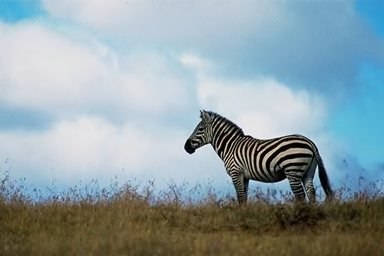

In [9]:
real_image_path = '../input/casia-dataset/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

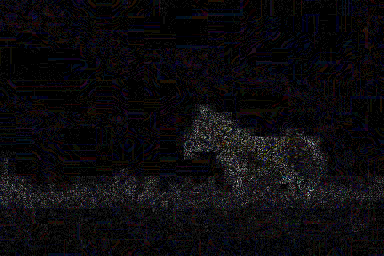

In [10]:
convert_to_ela_image(real_image_path, 90)

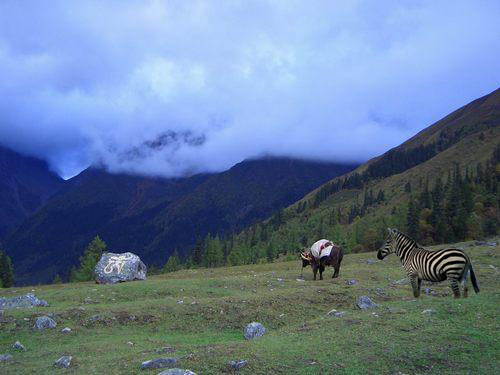

In [11]:
fake_image_path = '../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
Image.open(fake_image_path)

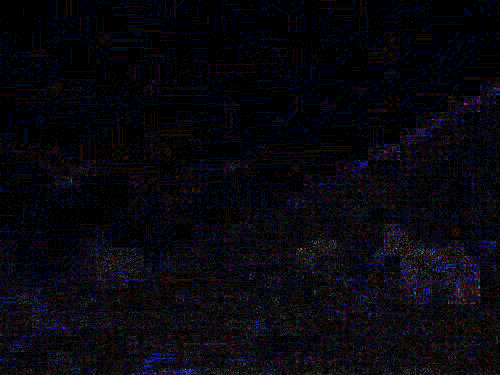

In [12]:
convert_to_ela_image(fake_image_path, 90)

DENOISING REAL IMAGE

In [14]:
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
import skimage.io

img_r=skimage.io.imread('../input/casia-dataset/CASIA2/Au/Au_ani_00001.jpg')
img_r=skimage.img_as_float(img_r) 

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


In [15]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
psnr_noisy

361.20199909921956

In [16]:
psnr_bayes = cv2.PSNR(img_r,img_bayes)
psnr_bayes

124.60573219905689

In [17]:
psnr_visu = cv2.PSNR(img_r,img_visushrink)
psnr_bayes

124.60573219905689

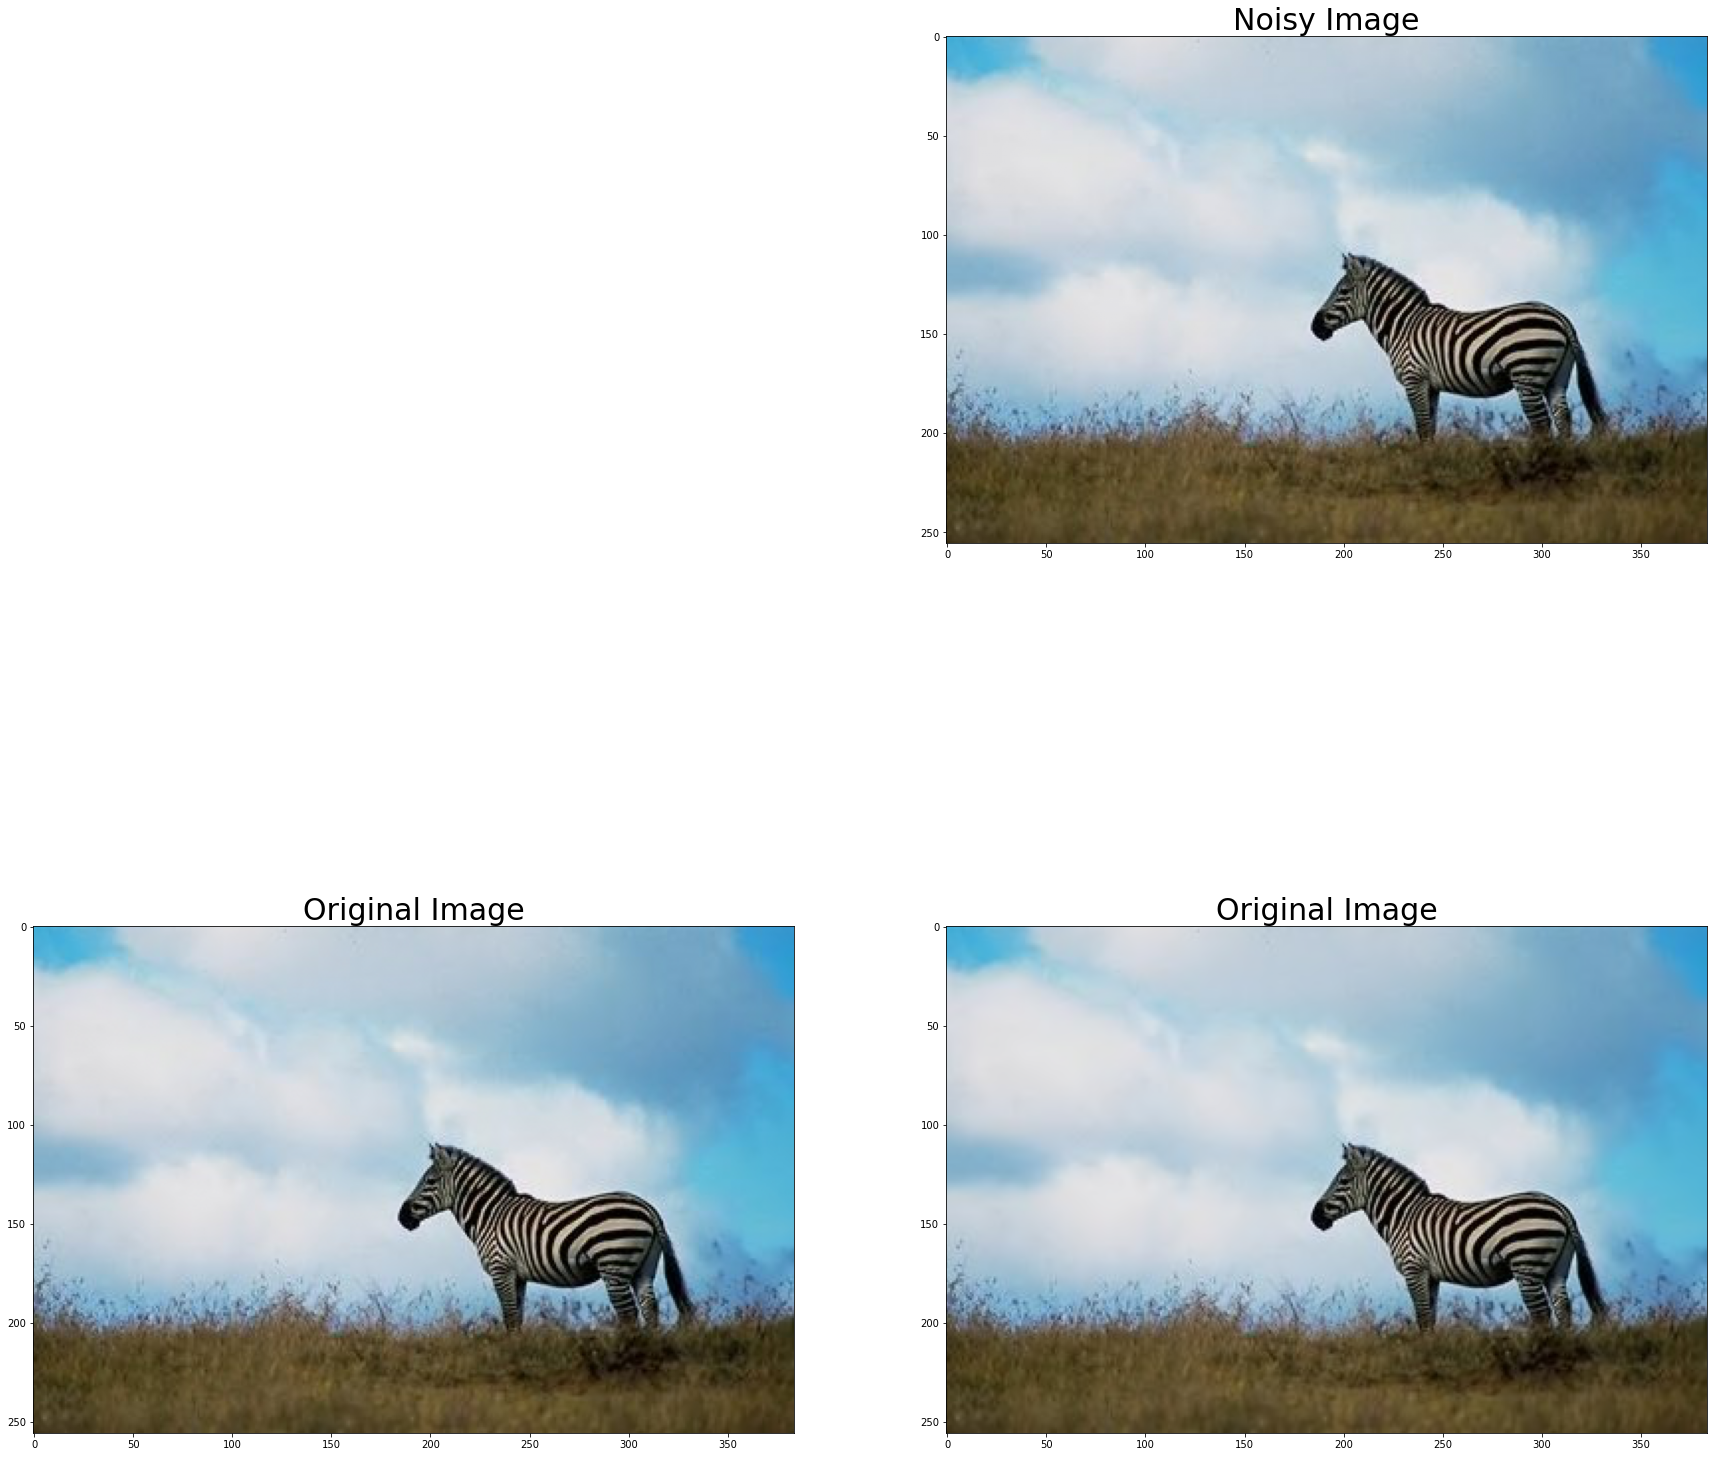

In [20]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,2)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [21]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)


PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 100.08271190521796
PSNR[Original vs. Denoised(Bayes)] 124.60573219905689


DENOISING FAKE IMAGE

In [23]:
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
import skimage.io

img_f=skimage.io.imread('../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
img_f=skimage.img_as_float(img_f) 


sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation
img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


In [24]:
import cv2
psnr_noisy = cv2.PSNR(img_f,img_f)
psnr_noisy

361.20199909921956

In [25]:
psnr_bayes = cv2.PSNR(img_f,img_bayes)
psnr_bayes

120.58626094108678

In [26]:
psnr_visu = cv2.PSNR(img_f,img_visushrink)
psnr_bayes

120.58626094108678

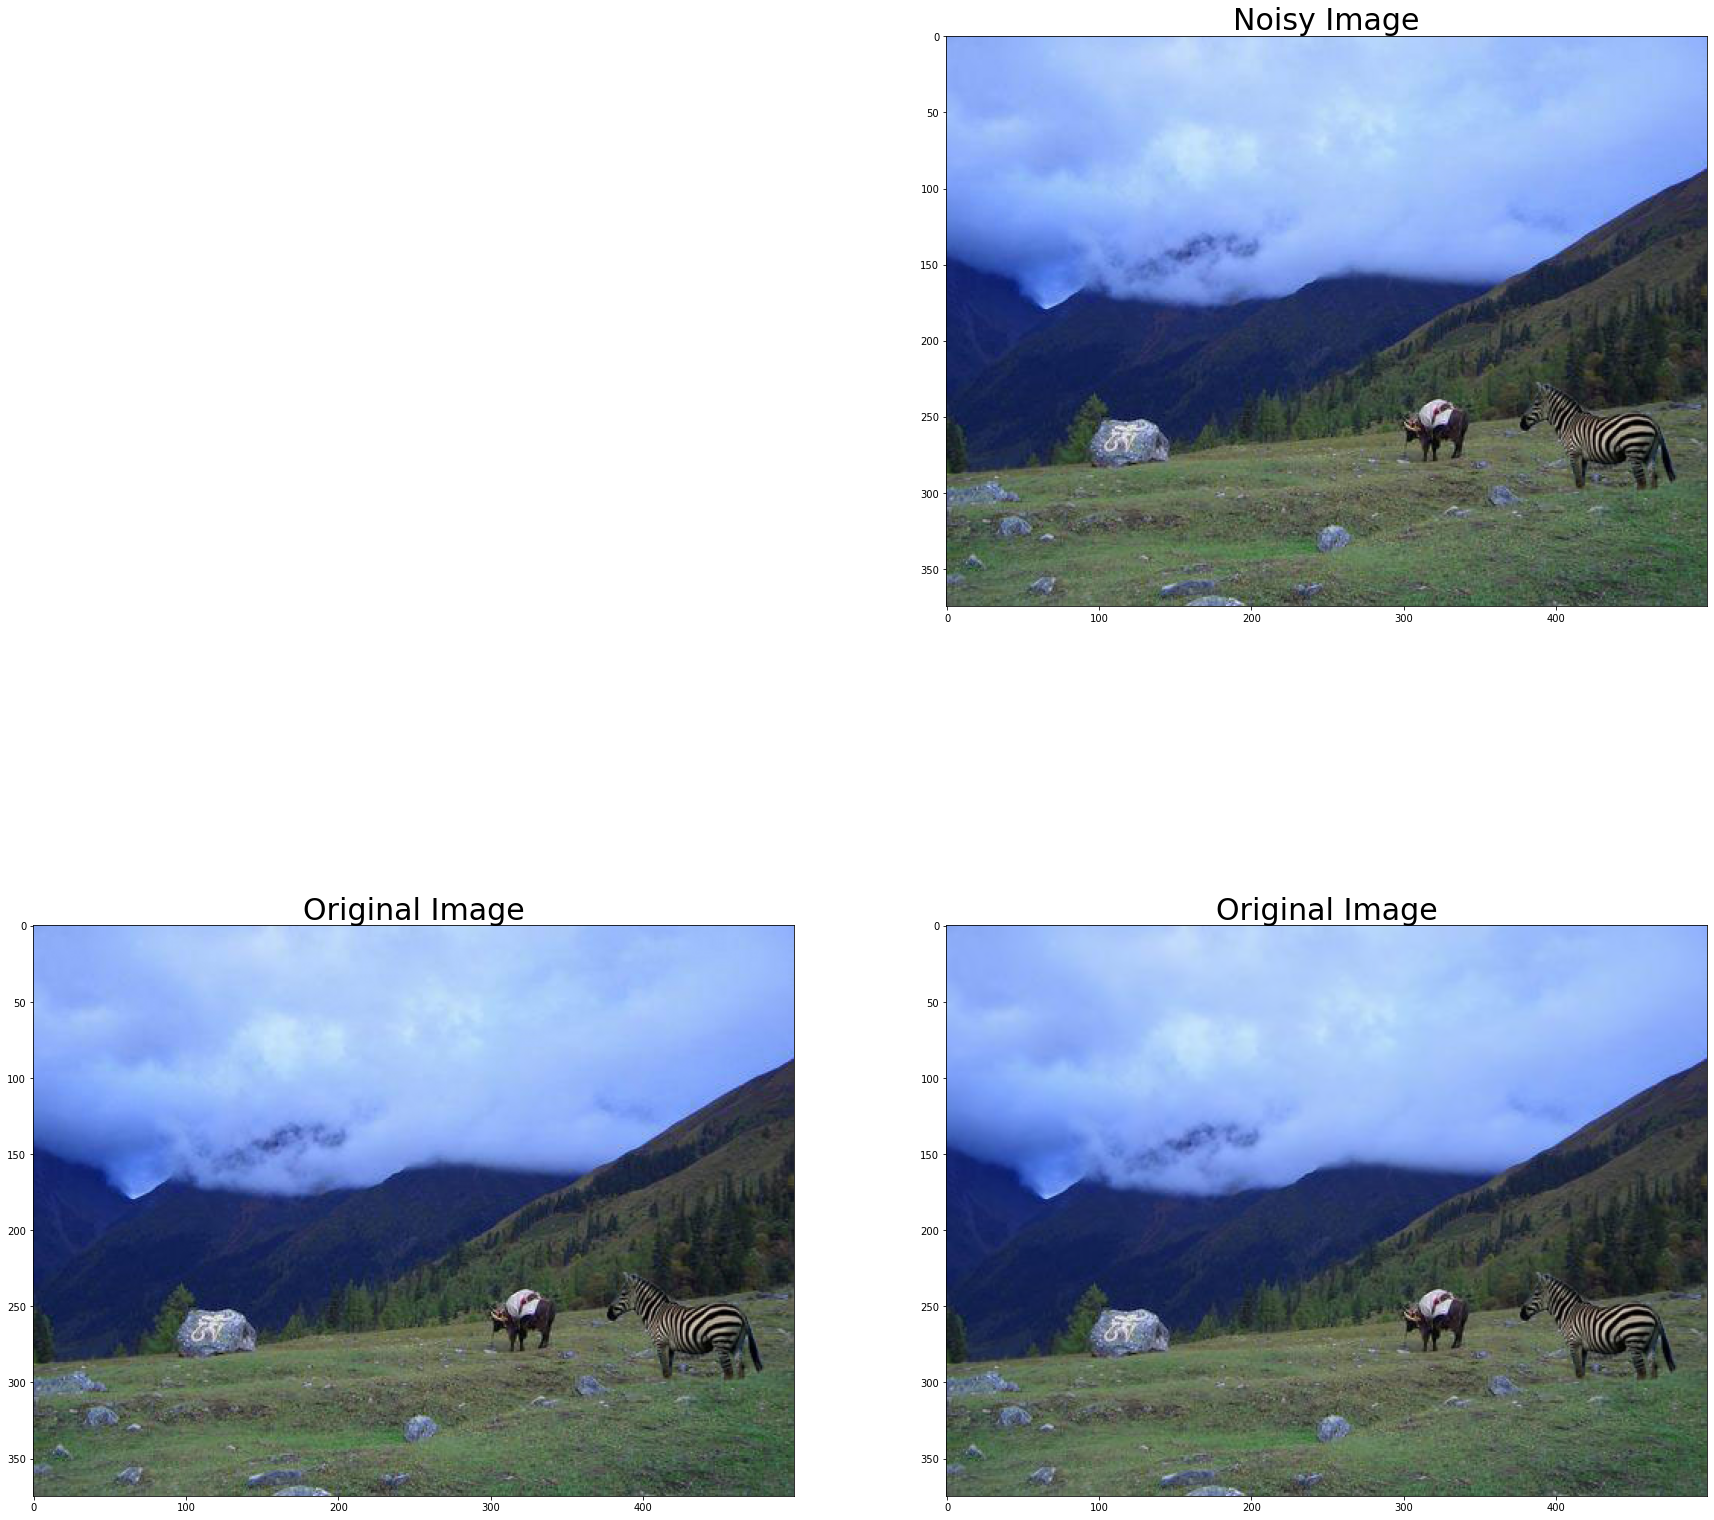

In [27]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,2)
plt.imshow(img_f,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [28]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 97.24783471476827
PSNR[Original vs. Denoised(Bayes)] 120.58626094108678


In [29]:
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
import skimage.io

In [30]:
def denoise_img(img):
    img=skimage.io.imread('../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
    img=skimage.img_as_float(img_f)


    sigma_est=estimate_sigma(img,multichannel=True,average_sigmas=True) 
    img_bayes=denoise_wavelet(img,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

    img_visushrink=denoise_wavelet(img,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
    wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)
    return img_bayes 


In [31]:
image_size = (128, 128)

In [32]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [33]:
X = []
Y = [] 

In [34]:
import random
path = '../input/casia-dataset/CASIA2/Au/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images


/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


In [35]:
import numpy as np
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [36]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

1680 1680
420 420


In [37]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [38]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

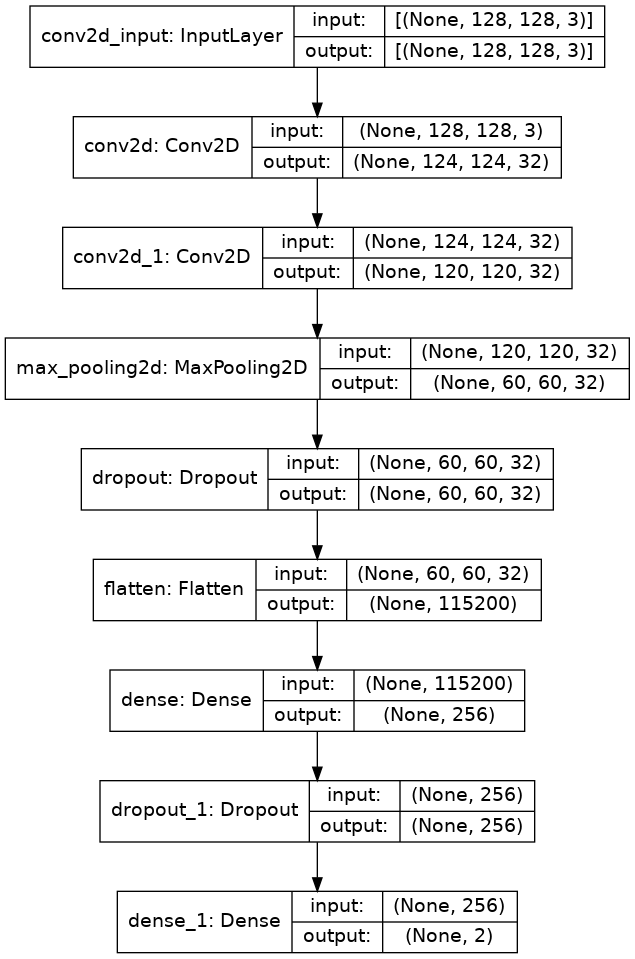

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])



In [43]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(X_train, copy=True) 
y_train2 = np.array(Y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )


datagen.fit(X_train)

print(type(X_train))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=32, subset='validation')
train_generator = datagen.flow(x_train2, y_train2,batch_size=32, subset='training')

history = model.fit_generator(train_generator, epochs=30, validation_data = (X_val,Y_val), verbose = 1,callbacks = [early_stopping])

<class 'numpy.ndarray'>


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
42/42 [==============================] - 12s 167ms/step - loss: 0.0515 - accuracy: 0.9652 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 2/30
42/42 [==============================] - 7s 160ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.2139e-08 - val_accuracy: 1.0000
Epoch 3/30
42/42 [==============================] - 7s 154ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1855e-08 - val_accuracy: 1.0000
Epoch 4/30
42/42 [==============================] - 7s 154ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1855e-08 - val_accuracy: 1.0000
Epoch 5/30
42/42 [==============================] - 6s 153ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1855e-08 - val_accuracy: 1.0000
Epoch 6/30
42/42 [==============================] - 7s 157ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1855e-08 - val_accuracy: 1.0000
Epoch 7/30
42/42 [==============================] - 6s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

In [45]:
init_lr = 1e-4
epochs=30
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [46]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [49]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = 32,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/30
53/53 [==============================] - 6s 110ms/step - loss: 8.4555e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/30
53/53 [==============================] - 5s 100ms/step - loss: 2.1414e-07 - accuracy: 1.0000 - val_loss: 9.8166e-10 - val_accuracy: 1.0000
Epoch 3/30
53/53 [==============================] - 5s 100ms/step - loss: 1.2735e-07 - accuracy: 1.0000 - val_loss: 7.1181e-10 - val_accuracy: 1.0000
Epoch 4/30
53/53 [==============================] - 5s 100ms/step - loss: 2.9115e-08 - accuracy: 1.0000 - val_loss: 6.2764e-10 - val_accuracy: 1.0000
Epoch 5/30
53/53 [==============================] - 5s 100ms/step - loss: 3.5653e-08 - accuracy: 1.0000 - val_loss: 5.1556e-10 - val_accuracy: 1.0000
Epoch 6/30
53/53 [==============================] - 5s 100ms/step - loss: 3.8486e-08 - accuracy: 1.0000 - val_loss: 3.9397e-10 - val_accuracy: 1.0000
Epoch 7/30
53/53 [==============================] - 5s 100ms/step - loss: 1.8035e-08 - accuracy: 1.0000 

In [ ]:
model.save('model_casia_run1.h5')

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '../input/casia-dataset/CASIA2/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
fake_image_path = '../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
fake_image = os.listdir('../input/casia-dataset/CASIA2/Tp/')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('../input/casia-dataset/CASIA2/Tp/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

In [ ]:
real_image = os.listdir('../input/casia-dataset/CASIA2/Au/')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('../input/casia-dataset/CASIA2/Au/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
# for filename in os.listdir(f'../input/casia-dataset/CASIA2/Tp/{i}'):
#        img = f'../input/casia-dataset/CASIA2/Tp/{i}/{filename}'
from keras.preprocessing import image
images = []
for img in os.listdir('../input/casia-dataset/CASIA2/Tp/'):
    img = image.load_img(img, target_size=(128, 128))
    img = img.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
images = np.vstack(images)
classes = classifier.predict(images, batch_size=10)
print(classes)

In [ ]:
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50

In [ ]:
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet_model=ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model_aug=Sequential()
model_aug.add(resnet_model)

top_model=Sequential()
top_model.add(Flatten(input_shape=(2, 2, 2048)))

top_model.add(Dense(64, activation='relu'))
# model_aug.add(Dropout(0.2))

top_model.add(Dense(1, activation='sigmoid'))

model_aug.add(top_model)

for layer in model_aug.layers[0].layers[:171]:
    layer.trainable=False

In [ ]:
model_aug.load_weights('model_casia_run1.h5')

model_aug.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['accuracy'])

In [ ]:
model_aug.evaluate(X_val, Y_val, verbose=0)

In [ ]:
y_pred = model_aug.predict_classes(X_val)

In [ ]:
plot_confusion_matrix(Y_val, y_pred)
